The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to the specific campaign, special day, user profile, or period.

Attribute Information:

The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.



In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [80]:
#print all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#increase columns that can be printed to 300
pd.set_option('display.max_columns', 300)

In [81]:

OSI=pd.read_csv("Online Shoppers Intention.csv")

In [82]:
#Check for missing values:
OSI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

In [83]:
#Use Groupby statement to count the number of Returning_Visitor for each month. Which month has the highest returning visitors?

#OSI[["VisitorType","Month"]] #subset of 2 columns
#OSI.where(OSI['VisitorType'] == "Returning_Visitor") #where VisitorType=return.

OSI.where(OSI['VisitorType'] == "Returning_Visitor")[["VisitorType","Month"]].groupby("Month").count().sort_values('VisitorType', ascending=False)

,VisitorType
Month,
May,3045
Nov,2557
Mar,1675
Dec,1330
Oct,425
Jul,378
Aug,361
Sep,340
June,257


In [84]:
#drop rows with any missing values
OSI = OSI.dropna()
OSI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12316 non-null float64
SpecialDay                 12316 non-null float64
Month                      12316 non-null object
OperatingSystems           12316 non-null int64
Browser                    12316 non-null int64
Region                     12316 non-null int64
TrafficType                12316 non-null int64
VisitorType                12316 non-null object
Weekend                    12316 non-null bool
Revenue                    12316 non-null bool
dtypes:

In [88]:
#(Part a) What would be a meaningful data transformation for column Month? (apply the data transformation on this dataset)

#Month is currently 1 column with values like "jan". need to one-hot encode to get 12 columns each with 0/1 values.
#can use get dummies to do this

emb=pd.get_dummies(OSI['Month'],columns='Month')
emb.head()

OSI=pd.concat([OSI, emb], axis=1)
OSI.head()

OSI.drop(['Month'], axis=1, inplace=True) 

,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0,0,1,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0,0,1,0,0,0,0,0,0,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0,0,1,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0,0,1,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0,0,1,0,0,0,0,0,0,0


In [89]:
#(Part a) What would be a meaningful data transformation for column Weekend? (apply the data transformation on this dataset)

#weekend has two values, so we can map those to 0/1
OSI['Weekend'].unique()
OSI.Weekend.head()

#note that most text values being mapped to 0/1 would need to be inside quotation marks.  True and False are an exception.
OSI['Weekend'] = OSI['Weekend'].map({True: 1, False: 0}).astype(int)

OSI['Weekend'].unique()
OSI.Weekend.head()




array([False,  True])

0    False
1    False
2    False
3    False
4     True
Name: Weekend, dtype: bool

array([0, 1], dtype=int64)

0    0
1    0
2    0
3    0
4    1
Name: Weekend, dtype: int32

In [90]:
#Part a) What would be a meaningful data transformation for column Revenue? (apply the data transformation on this dataset)

#revenue also has T/F values, so use mapping to make binary
OSI['Revenue'].unique()
OSI.Revenue.head()

OSI['Revenue']=OSI['Revenue'].map({True: 1, False: 0}).astype(int)

OSI['Revenue'].head()
OSI['Revenue'].unique()

array([False,  True])

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int32

array([0, 1], dtype=int64)

In [91]:
#(Part a) In column VisitorType, map Returning_Visitor to 0, New_Visitor to 1 and , Other to 2. Which label (0, 1, or 2) has the highest number of instances in this dataset?

OSI['VisitorType'].head()
OSI['VisitorType'].unique()

OSI['VisitorType']=OSI['VisitorType'].map({'Returning_Visitor':0, 'New_Visitor':1, 'Other':2})

OSI['VisitorType'].value_counts()

0    Returning_Visitor
1    Returning_Visitor
2    Returning_Visitor
3    Returning_Visitor
4    Returning_Visitor
Name: VisitorType, dtype: object

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

0    10537
1     1694
2       85
Name: VisitorType, dtype: int64

In [119]:
OSI.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,0,1,0,0,0,1,0,0,0,0,0,0,0


In [120]:
#Q1 Part a) Consider the VisitorType as target value y. Use train_test_split to split the feature set into train and test. 
#Consider random_state = 0 and all the other default values. Then use MinMax Scaler to scale the data.
#Train a KNeighborClassifier on dataset. 
#Which value of the hyperparame n_neighbors results in the worst overfitting problem?

#drop any last null values
#OSI_no_null = OSI.dropna()

#creating X and y matrices
OSI_X_Vars=OSI.drop(['VisitorType'], axis=1, inplace=False) 
X=OSI_X_Vars.as_matrix()

y=OSI['VisitorType'].as_matrix()

#splitting data
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

#Scaling data
from sklearn.preprocessing import MinMaxScaler
#sc.fit_transform: Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train_org) #fit_transform is equivalent to first doing sc.fit() followed by sc.transform()
#we dont want to use sc.fit on the test data set
X_test = sc.transform(X_test_org)

C:\Users\megan\AppData\Local\Continuum\anaconda3\envs\gpu_tf_conda_only\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\megan\AppData\Local\Continuum\anaconda3\envs\gpu_tf_conda_only\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

Text(0.5, 0, 'k')

Text(0, 0.5, 'Accuracy')

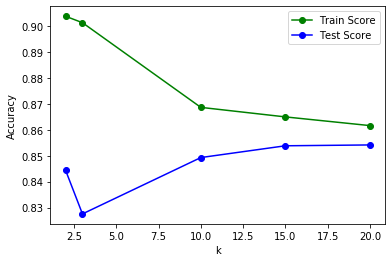

In [121]:
#Training KNN on the data
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []
neighbors = [2, 3, 10, 15, 20]

for k in neighbors:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

#best num of nieghbors here:want both test and train high and smallest diff bw them. 
x_axis = [2, 3, 10, 15, 20]
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g',  marker='o',)
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b',  marker='o',)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()


#worst overfitting occurs at __ because __

LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

Text(0.5, 0, 'C')

Text(0, 0.5, 'Accuracy')

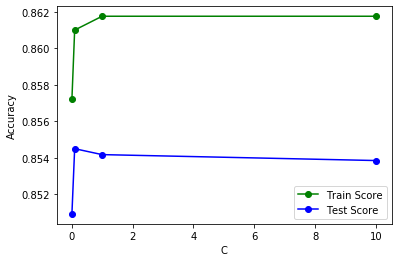

In [122]:
#Q2 (Part a) Train LinearSVC model on this dataset. Fine tune this model by changing the hyperparameter C in [0.01, 0.1, 1, 10]. 
#Which value of C results in a best fit. Consider the following hyper parameters:
#random_state = 0
#penalty = 'l2'
#dual = False
#max_iter = 10000

%matplotlib inline
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import LinearSVC

train_score_array = []
test_score_array = []
C_params = [0.01, 0.1, 1, 10]

for C in C_params:
    clf = LinearSVC(random_state = 0, penalty = 'l2', dual = False, max_iter = 10000, C=C)
    clf.fit(X_train,y_train)
    train_score_array.append(clf.score(X_train, y_train))
    test_score_array.append(clf.score(X_test, y_test))

#best num of nieghbors here:want both test and train high and smallest diff bw them. 
x_axis = [0.01, 0.1, 1, 10]
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g',  marker='o',)
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b',  marker='o',)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()


#not working currently, but normally you would want to graph what the decision boundry looks like.
#note that you can only plot 2 predictor features at any given time. we are using X_train[:,0:2] to plot the first 2 features of Xtrain
#plot_decision_regions(X_train[:,0:2], y_train, clf)
#plt.xlabel("Feature 0")
#plt.ylabel("Feature 1")
#recall we set visitor types as 'Returning_Visitor':0, 'New_Visitor':1, 'Other':2
#plt.legend(['Returning_Visitor', 'New_Visitor', 'Other'])

0    10537
1     1694
2       85
Name: VisitorType, dtype: int64

C:\Users\megan\AppData\Local\Continuum\anaconda3\envs\gpu_tf_conda_only\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\megan\AppData\Local\Continuum\anaconda3\envs\gpu_tf_conda_only\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\megan\AppData\Local\Continuum\anaconda3\envs\gpu_tf_conda_only\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\megan\AppData\Local\Continuum\anaconda3\envs\gpu_tf_conda_only\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\megan\AppData\Local\Continuum\anaconda3\envs\gpu_tf_conda_only\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

C:\Users\megan\AppData\Local\Continuum\anaconda3\envs\gpu_tf_conda_only\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 0, 'Regularization parameter: C')

Text(0, 0.5, 'Accuracy')

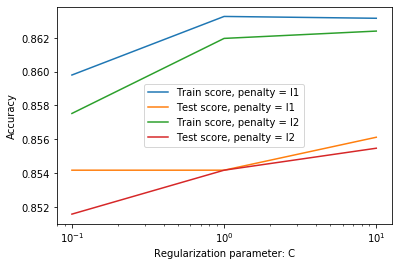

In [123]:
#Q4 (Part a) Train a LogisticRegression model. 
#Among values C in [0.1, 1, 10] and penalty in ['l1', 'l2'], which combination will give the best fit? 
#(set random_state = 0 and solver = 'liblinear')


#minmax scaler is also appropriate for logistic regression so scaling is already appropriate

#how balanced is the dataset?
OSI['VisitorType'].value_counts()

from sklearn.linear_model import LogisticRegression


#c is coefficient of costfunction.  changing its value can increase or decrease the impact of the regularization term.
#penalty term/regularization term is made up of C*lasso term or C*ridge term.

c_range = [0.1, 1, 10]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []


#note: homework instructions say to use liblinear algoritm but this algorithm doesnt apply to multinomial case..
for c in c_range:
    log_l1 = LogisticRegression(random_state=0, solver='liblinear', penalty = 'l1', C = c)#instantiate model
    log_l2 = LogisticRegression(random_state=0, solver='liblinear', penalty = 'l2', C = c)#these are using lbgfs by default
    log_l1.fit(X_train, y_train) #train the model
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train)) #see performance
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))
    

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

Text(0.5, 0, 'Max Depth')

Text(0, 0.5, 'Accuracy')

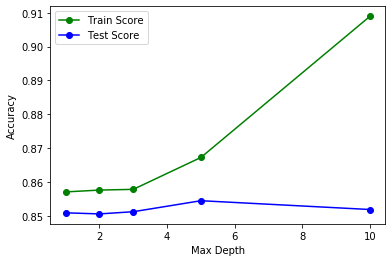

In [124]:
#Q5 (Part a) Train a DecisionTreeClassifier model on this dataset. 
#Which max_depth in [1, 2, 3, 5, 10] results in the best fit? 
#(choose the value that both train and test scores are high and the gap between train and test score is small. 
#Set random_state = 0).

%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier

#dtree = DecisionTreeClassifier(random_state=0)
#dtree.fit(X_train, y_train)
#print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
#print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))



train_score_array = []
test_score_array = []
max_d = [1, 2, 3, 5, 10]

for i in max_d:
    dtree = DecisionTreeClassifier(random_state=0, max_depth=i)
    dtree.fit(X_train,y_train)
    train_score_array.append(dtree.score(X_train, y_train))
    test_score_array.append(dtree.score(X_test, y_test))

#best num of nieghbors here:want both test and train high and smallest diff bw them. 
x_axis = [1, 2, 3, 5, 10]
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g',  marker='o',)
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b',  marker='o',)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()

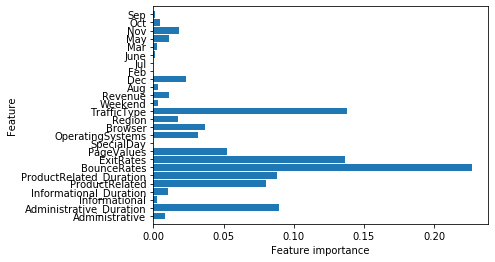

In [125]:
#Q6 Part a) Consider the max_depth in the previous question. 
#Which feature is the most important feature according to DecisionTreeClassifier model?


%matplotlib inline
def plot_feature_importances(model):
    n_features = X_train.shape[1] #num of columns
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), OSI_X_Vars.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    

plot_feature_importances(dtree)

In [126]:
OSI['VisitorType']=OSI['VisitorType'].map({'Returning_Visitor':0, 'New_Visitor':1, 'Other':2})


clf = LinearSVC(random_state = 0, penalty = 'l2', dual = False, max_iter = 10000, C=.01)
clf.fit(X_train,y_train)
clf.score(X_train, y_train)
clf.score(X_test, y_test)




LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

0.8572047201472339

0.850925625202988

In [127]:
#Q1 (Part a) What is the ratio of label 1 to all the labels in the whole dataset? (consider four significant digits)

#there are 3 classes in the dependent variable.
y.astype('str')

pd.Series(y.astype('str')).value_counts() #finding frequency of each value

total_rows=len(y)

ratio_of_label1_to_overall_dataset=1694/total_rows

ratio_of_label1_to_overall_dataset

array(['0', '0', '0', ..., '0', '0', '1'], dtype='<U21')

0    10537
1     1694
2       85
dtype: int64

0.13754465735628452

In [128]:
from sklearn.metrics import precision_score
#Q2 (Part a) Train a LogisticRegression model on this dataset. Set the hyper-parameters as follow. 
# random_state = 0
# solver = 'lbfgs'
# max_iter = 10000
# multi_class = 'auto'
#What is the train macro precision score? (with four significant digits)

#The model:
model = LogisticRegression(solver="lbfgs", random_state=0, max_iter=10000, multi_class='auto')  #show its multinomial by setting multi_class while using log reg.  #lbfgs uses entropy as part of algorithm.
model.fit(X_train, y_train)

train_pred = model.predict(X_train)

#train macro precision score
print("Macro average train precision score: {:.5f}".format
(precision_score(y_train, train_pred, average="macro")))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Macro average train precision score: 0.83885


In [129]:
#Q3 (Part a) Train a LogisticRegression model on this dataset. 
#Set the hyper-parameters as follow. What is the train micro recall score? (with four significant digits)
# random_state = 0
# solver = 'lbfgs'
# max_iter = 10000
# multi_class = 'auto'

from sklearn.metrics import recall_score

#The model:
model = LogisticRegression(solver="lbfgs", random_state=0, max_iter=10000, multi_class='auto')  #show its multinomial by setting multi_class while using log reg.  #lbfgs uses entropy as part of algorithm.
model.fit(X_train, y_train)

train_pred = model.predict(X_train)

#train macro precision score
print("Macro average train precision score: {:.5f}".format
(recall_score(y_train, train_pred, average="micro")))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Macro average train precision score: 0.86294


In [130]:
from sklearn.metrics import accuracy_score

#Q4 (Part a) Train a dummy classifier that classifies everything as the majority class of the training data. 
#What is the train accuracy of this classifier? (numbers with four significant digits)
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train, y_train)


train_pred = dummy_majority.predict(X_train)

#0 is the most frequent label, so all predictions are 0
print("Unique predicted labels: {}".format(np.unique(train_pred)))


#Two ways to calculate accuracy:
print("Train Accuracy score: {:.5f}".format
(accuracy_score(y_train, train_pred)))

print("Train Accuracy score: {:.5f}".format(dummy_majority.score(X_train, y_train)))




DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

Unique predicted labels: [0]
Train Accuracy score: 0.85710
Train Accuracy score: 0.85710


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Text(0.5, 1.0, 'Confusion matrix')

0.6507936507936508

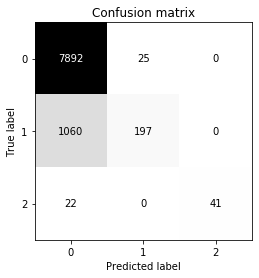

In [131]:
#Q5 (Part a) Train a SVC(kernel = 'rbf', C = 10, gamma= 1) on the train dataset. 
#Create the confusion matrix of this classification. 
#What percentage of instances with label 2 has been predicted correctly using this classification model? 
#(Enter the value with 4 significant digits.)

#note: this question is asking for train score performance

from sklearn.svm import SVC
import mglearn
from sklearn.metrics import confusion_matrix

#The model
model=SVC(kernel='rbf', C=10, gamma=1, random_state=0)
model.fit(X_train, y_train)



train_pred = model.predict(X_train)
#confusion matrix
#A great model would show a dark diagonal, indicating that the majority of the points were predicted as thier true class
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_train, train_pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=['0','1', '2'],
    yticklabels=['0','1', '2'], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()


41/(22+41)

#If the question was for test performance, this would be the code:
# #predictions
# test_pred = model.predict(X_test)
# #confusion matrix
# #A great model would show a dark diagonal, indicating that the majority of the points were predicted as thier true class
# scores_image = mglearn.tools.heatmap(
#     confusion_matrix(y_test, test_pred), xlabel='Predicted label',
#     ylabel='True label', xticklabels=['0','1', '2'],
#     yticklabels=['0','1', '2'], cmap=plt.cm.gray_r, fmt="%d")
# plt.title("Confusion matrix")
# plt.gca().invert_yaxis()
# instances_with_label2=22
# instances_correctly_predicted_as_2=10
# instances_correctly_predicted_as_2/instances_with_label2

In [132]:
#Q6
#(Part a) Use GridSearchCV to find the best parameters for SVC(kernel = 'rbf'). 
#Consider the [0.1, 1, 10] for both C and gamma. Set random_state = 0 and cv = 5. What are the best parameters?

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[.1, 1, 10],
             'gamma': [.1, 1, 10]}

grid2 = GridSearchCV(SVC(random_state=0, kernel='rbf'), 
                     param_grid, cv =5 , return_train_score= True)
grid2.fit(X_train, y_train)
print(grid2.best_params_)
print(grid2.best_score_)
print(grid2.scorer_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

{'C': 1, 'gamma': 0.1}
0.8614268701959511
<function _passthrough_scorer at 0x000001AC58F7A8B8>


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Text(0.5, 1.0, 'Confusion matrix')

0.6349206349206349

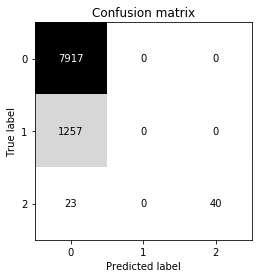

In [133]:
#Q7
#(Part a) Train SVC using the best parameter found in the previous questions, find the confusion matrix. 
#Now what percentage of the instances with label 2 has been predicted correctly using this classification model? 
#(Enter the value with 4 significant digits.)


#note: this question is asking for train score performance

#The model
model=SVC(random_state=0, kernel='rbf', C=1, gamma=.1)
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
#confusion matrix
#A great model would show a dark diagonal, indicating that the majority of the points were predicted as thier true class
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_train, train_pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=['0','1', '2'],
    yticklabels=['0','1', '2'], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

40/(23+40)

#If the question was for test performance, this would be the code:
# #predictions
# test_pred = model.predict(X_test)
# #confusion matrix
# #A great model would show a dark diagonal, indicating that the majority of the points were predicted as thier true class
# scores_image = mglearn.tools.heatmap(
#     confusion_matrix(y_test, test_pred), xlabel='Predicted label',
#     ylabel='True label', xticklabels=['0','1', '2'],
#     yticklabels=['0','1', '2'], cmap=plt.cm.gray_r, fmt="%d")
# plt.title("Confusion matrix")
# plt.gca().invert_yaxis()

# instances_predicted_as_2=22
# instances_correctly_predicted_as_2=12
# instances_correctly_predicted_as_2/instances_predicted_as_2

## Lab 6

In [134]:
#Q1
# (Part a) First, train the following models on X_train and y_train. 
# Logistic Regression with solver = 'liblinear', multi_class = 'auto', max_iter = 50, random_state = 0
# Decision tree with max_depth = 1
# Support vector machine with kernel = 'linear', C = 0.001.
# In the all above models, set random_sate = 0. Compute the train macro recall score of the hard-voting classifier? (four significant digits)

LRmodel=LogisticRegression(solver='liblinear', multi_class='auto', max_iter=50, random_state=0)
LRmodel.fit(X_train, y_train)
DTmodel=DecisionTreeClassifier(max_depth=1, random_state=0)
DTmodel.fit(X_train, y_train)
SVCmodel=SVC(kernel='linear', C=.001, random_state=0)
SVCmodel.fit(X_train, y_train)

#hard-voting is a simple majority vote where each model has equal voting wieght.
#this question is saying to make predictions based on the majority vote of the 3 models and then find how well this worked using train macro recall score.
#it appears that the estimators arguement takes models and thier names. you can assign whatever name you want
from sklearn.ensemble import VotingClassifier
hard_vote_ensemble = VotingClassifier(estimators=[('lr', LRmodel), ('dt', DTmodel), ('svc', SVCmodel)], voting='hard')
hard_vote_ensemble.fit(X_train, y_train)

#when you have small num of classifiers youll likely only slightly outperform the individual models
#if you are doing hard voting you want the indivdual models to be about equally well performing on thier own
from sklearn.metrics import classification_report
for clf in (LRmodel, DTmodel, SVCmodel, hard_vote_ensemble):
    currentfit=clf.fit(X_train, y_train) #only assigning to currentfit in order to stop the model specs from printing. otherwise not needed
    y_pred = currentfit.predict(X_train)
    print(clf.__class__.__name__, recall_score(y_train, y_pred, average="macro"))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=50,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=1,
                                             

LogisticRegression 0.5179291366436457
DecisionTreeClassifier 0.3333333333333333
SVC 0.3333333333333333
VotingClassifier 0.3333333333333333


In [135]:
#Q2
#(Part a) In the previous question change the voting strategy to soft voting. 
#What is the macro recall score? (four significant digits)

#when changing from hard voting to soft voting, we needed to add the "probability=True" arguement so that the SVC model returns probability estimates
LRmodel=LogisticRegression(solver='liblinear', multi_class='auto', max_iter=50, random_state=0)
LRmodel.fit(X_train, y_train)
DTmodel=DecisionTreeClassifier(max_depth=1, random_state=0)
DTmodel.fit(X_train, y_train)
SVCmodel=SVC(kernel='linear', C=.001, random_state=0, probability=True)
SVCmodel.fit(X_train, y_train)

#just change "voting=" to soft
from sklearn.ensemble import VotingClassifier
soft_vote_ensemble = VotingClassifier(estimators=[('lr', LRmodel), ('dt', DTmodel), ('svc', SVCmodel)], voting='soft')
soft_vote_ensemble.fit(X_train, y_train)

#same as before
from sklearn.metrics import classification_report
for clf in (LRmodel, DTmodel, SVCmodel, soft_vote_ensemble):
    currentfit=clf.fit(X_train, y_train) #only assigning to currentfit in order to stop the model specs from printing. otherwise not needed
    y_pred = currentfit.predict(X_train)
    print(clf.__class__.__name__, recall_score(y_train, y_pred, average="macro"))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=50,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=1,
                                             

LogisticRegression 0.5179291366436457
DecisionTreeClassifier 0.3333333333333333
SVC 0.3333333333333333
VotingClassifier 0.5343915343915344


In [136]:
#Q3
# (Part a) Train a bagging classifier on base model logistic regression with 
#default parameters (solver = 'lbfgs', random_state = 0, multi_class = 'auto'). 
#Set the hyper-parameter as follow:
# n_estimators = 100 
# max_samples = 500 
# max_features = 5 
# random_state = 0
# What is out-of-bag score? (Four significant digits)

#Bagging is when you take n samples of the train data, and use them to fit n models. then allow them to vote
#Pasting is when you do the same, but with sample replacement.  This is still done using scikit learn's BaggingClassifier()
#set argument bootstap=False if you dont want replacemetn

#Even though it isn't stated in the problem here, we do want to be sampling with replacement (aka pasting/bootstrapping)
#We know this because the out-of-bag score is asked for. this attribute only applies to models that are bagged with replacement

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#bagging classifier : first need to create its base model
#N_estimators is the number of base models you are creating. here its 100 logistic regression models
#max_samples is the number of rows to train each model on
#max_features is the number of columns to use in the prediction

LRmodel=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=50, random_state=0)
bag_clf = BaggingClassifier(LRmodel, n_estimators=100, max_samples=500, max_features=5, bootstrap=True, random_state=0, oob_score=True)

#train same way as before.
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)


#
bag_clf.oob_score_

#out-of-bag estimates are like validation scores for cross validation.  
#just as validation sets are the portion of the train data that wasn't used to train a particualar fold
#the oob observations are part of the training set, but they are the portion of the data that wasn't used to train a particular model
#if there are 3 models where a given point is out-of-bag, you can take the predictions from all 3, and take the average.  this is your out-of-bag estiamte for that point.
#you can take the out-of-bag predictions for each point and compare with true values in order to create oob_score which is an estimation of actual test score (fully held out data never seen by models).


BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=50,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=0,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=5,
                  max_samples=500, n_estimators=100, n_jobs=None,
                  oob_score=True, random_state=0, verbose=

0.8570964598895745

In [137]:
#Q4
#Part a) Use a grid search to find the best parameters of a random forest machine learning model on this dataset.
#max_depth in [1, 3, 5, 7] 
#max_features in [5, 7, 9] 
#n_estimators in [100, 200, 500] 
#random_state = 0 
#cv = 5
#What are the best parameters of the model? 
#max_depth? max depth is 7


from sklearn.ensemble import RandomForestClassifier

#Grid Search
param_grid = {'max_depth': [1,3,5,7],
             'max_features': [5, 7, 9],
              'n_estimators': [100, 200, 500]}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0, n_jobs=-1), param_grid, cv=5, return_train_score=True, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

#Q5
#Part a) In the previous question, what is the best value of hyperparameter max_features?
#its 9

#Q6
#In question 4, what is the best value of hyperparameter n_estimators ?
#its 500

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max

Best parameters: {'max_depth': 7, 'max_features': 9, 'n_estimators': 500}
Best cross-validation score: 0.87


In [138]:
OSI_X_Vars.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object')

In [139]:
#Q7
#(Part a) Train a random forest machine learning model on this dataset using the best parameters in the previous question. 
#Which feature has the highest importance?

model = RandomForestClassifier(n_estimators=500, max_depth=7, max_features=9, n_jobs=-1, random_state=0)
model.fit(X_train, y_train)
print("Full train set accuracy score: {:.3f}".format(model.score(X_train, y_train)))
print("Test set accuracy score: {:.3f}".format(model.score(X_test, y_test)))

print('importance')
for name, score in zip(OSI_X_Vars.columns, model.feature_importances_):
    print(name, round(score, 3))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Full train set accuracy score: 0.889
Test set accuracy score: 0.864
importance
Administrative 0.034
Administrative_Duration 0.079
Informational 0.003
Informational_Duration 0.005
ProductRelated 0.097
ProductRelated_Duration 0.09
BounceRates 0.234
ExitRates 0.176
PageValues 0.038
SpecialDay 0.002
OperatingSystems 0.038
Browser 0.047
Region 0.011
TrafficType 0.092
Weekend 0.003
Revenue 0.016
Aug 0.001
Dec 0.012
Feb 0.0
Jul 0.001
June 0.001
Mar 0.002
May 0.006
Nov 0.005
Oct 0.002
Sep 0.004


In [140]:
#Attempting bagging WITHOUT replacement.
#UNCLEAR WHY THIS RUNS..should error out bc we dont have enough data to do this without replacement.....
X_train.shape

LRmodel=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=50, random_state=0)
bag_clf = BaggingClassifier(LRmodel, n_estimators=100, max_samples=1000, bootstrap=False, random_state=0)

#train same way as before.
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

(9237, 26)

C:\Users\megan\AppData\Local\Continuum\anaconda3\envs\gpu_tf_conda_only\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\megan\AppData\Local\Continuum\anaconda3\envs\gpu_tf_conda_only\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\megan\AppData\Local\Continuum\anaconda3\envs\gpu_tf_conda_only\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\megan\AppData\Local\Continuum\anaconda3\envs\gpu_tf_conda_only\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\U

C:\Users\megan\AppData\Local\Continuum\anaconda3\envs\gpu_tf_conda_only\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\megan\AppData\Local\Continuum\anaconda3\envs\gpu_tf_conda_only\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\megan\AppData\Local\Continuum\anaconda3\envs\gpu_tf_conda_only\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\megan\AppData\Local\Continuum\anaconda3\envs\gpu_tf_conda_only\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=50,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=0,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=1000, n_estimators=100, n_jobs=None,
                  oob_score=False, random_state=0, ver

0.8544982137057486


In [141]:
#Q1
#(Part a) Use PCA is to reduce the size of the feature space while retaining 95% of explained variance. 
#What is the size of the transformed feature space? (Number of features in the reduced dataset)

from sklearn.decomposition import PCA

#Instantiate PCA 
pca = PCA(n_components=.95, random_state=0)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

#Number of components needed to retain 95% of the variance in the original data
pca.n_components_

#Percentage of variance explained by each of the selected components
pca.explained_variance_ratio_

#total variance explained by all these PCs
pca.explained_variance_ratio_.sum()


15

array([0.18285712, 0.13292773, 0.12092129, 0.09881099, 0.0920747 ,
       0.06536285, 0.06063542, 0.04508227, 0.03025893, 0.02750245,
       0.02477211, 0.02366022, 0.02039689, 0.01690916, 0.0143289 ])

0.9565010414853153

In [142]:
X_train_reduced.shape
X_test_reduced.shape
y_train.shape
y_test.shape

(9237, 15)

(3079, 15)

(9237,)

(3079,)

In [143]:
#Q2 #Q3
#(Part a) For the rest of this lab, we will consider the reduced train and test sets. 
#For models with hyper-parameter random_state = 0. Use grid search to find the best parameters of 
#a support vector machine with the kernel 'rbf' and following range of parameters:
# C in [0.1, 1, 10]
# gamma in [0.1, 1, 10]
# cv = 5
#Q2 What is the best value of hyperparameter C of this model?
#Q3 (Part a) what is the best value of hyperparameter gamma?



#SVC linear kernel
param_grid = {'C': [.1, 1, 10],
              'gamma': [.1,1,10]}

#grid search components:
    #base model, 
    #param grid, so it knows what to test
    #num of folds you want to use
    #retun_train_score, faster to not do this, but if you want them set it to true. often nice to look at and plot so you can compare with test to see if there is a large gap

grid_search = GridSearchCV(SVC(kernel='rbf', random_state=0), param_grid, cv=5, return_train_score=True, scoring='accuracy')

grid_search.fit(X_train_reduced, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.86


In [144]:
#Q4
#(Part a) Train a gradient boosting machine-learning model on the reduced dataset with the following hyper-parameters.
# n_estimators= 100
# learning_rate=0.5
# random_state = 0
# What is the macro recall score of the test set? (4 significant digits)

from  sklearn.ensemble import GradientBoostingClassifier

GBC=GradientBoostingClassifier(random_state=0, n_estimators=100, learning_rate=.5)
GBC.fit(X_train_reduced, y_train)

#test macro recall score
test_pred = GBC.predict(X_test_reduced)

print("Macro average test recall score: {:.5f}".format(recall_score(y_test, test_pred, average="macro")))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Macro average test recall score: 0.54489
